In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [69]:
img = cv.imread(r"F:\Work\Xray_Data\Blur\Result_6_30fps\163128357_0217_1.tif")

In [70]:
img.shape

(86, 42, 3)

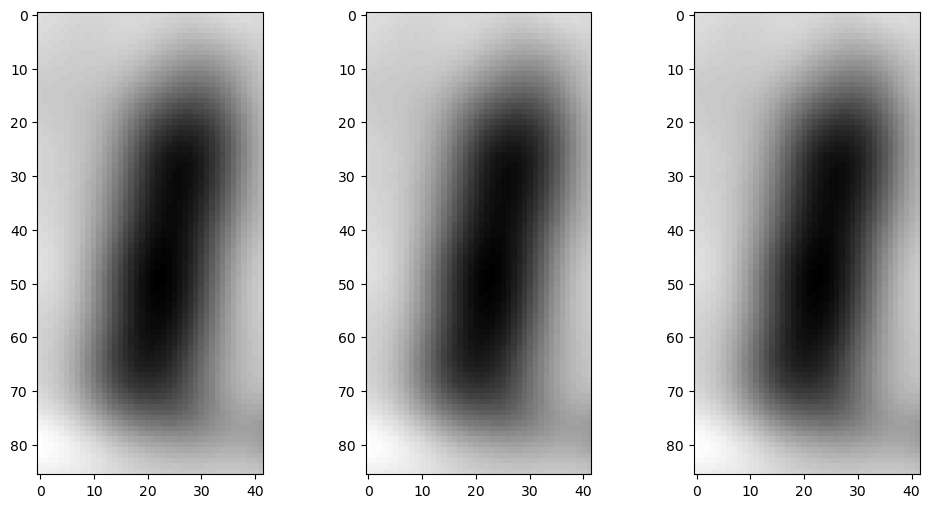

In [71]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img[:,:,0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img[:,:,1], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img[:,:,2], cmap='gray')


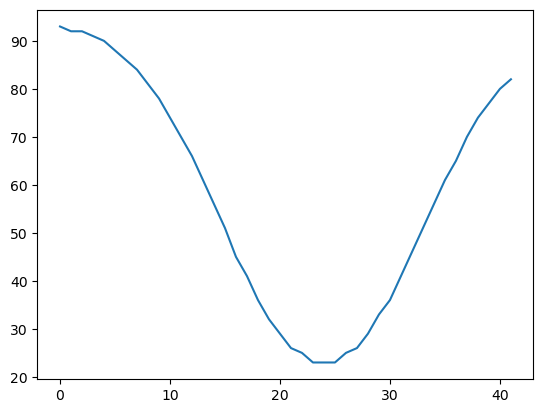

In [72]:
plt.plot(img[40,:,0])

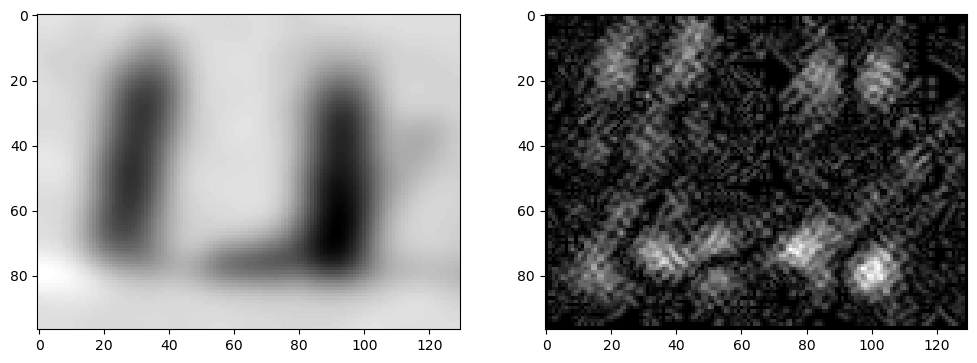

In [38]:
sobelx = cv.Sobel(src=img[:,:,0], ddepth=cv.CV_64F, dx=1, dy=1, ksize=5)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img[:,:,0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(cv.convertScaleAbs(sobelx), cmap='gray')

In [51]:
def sidebyside(original, converted):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(original, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(converted)

In [48]:
laplacian = cv.Laplacian(img[:,:,0],25,cv.CV_64F)
sidebyside(img[:,:,0], laplacian)

error: OpenCV(4.10.0) D:/a/opencv-python/opencv-python/opencv/modules/imgproc/src/filter.simd.hpp:3252: error: (-213:The function/feature is not implemented) Unsupported combination of source format (=0), and destination format (=1) in function 'cv::opt_SSE4_1::getLinearFilter'


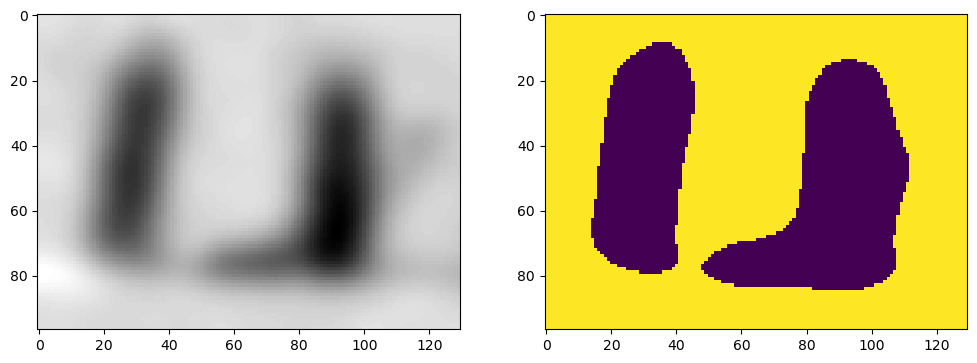

In [68]:
res, thres = cv.threshold(img[:,:,0], 70, 255, cv.THRESH_BINARY)
sidebyside(img[:,:,0], thres)

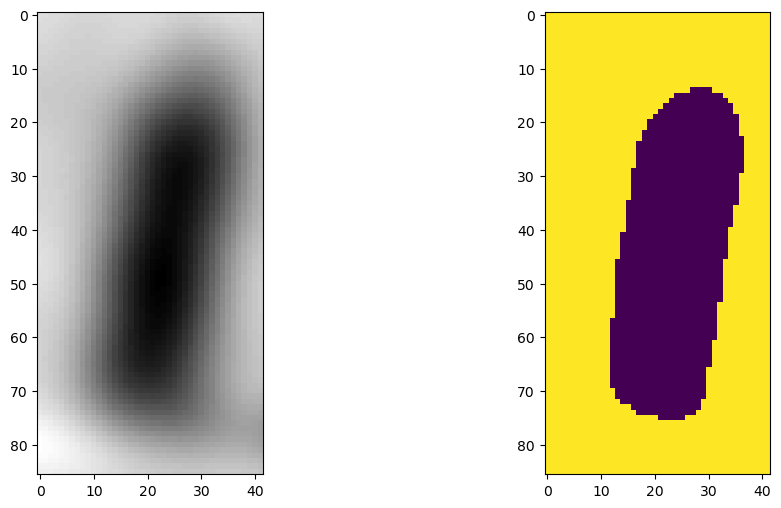

In [74]:
res, thres = cv.threshold(img[:,:,0], 55, 255, cv.THRESH_BINARY)
sidebyside(img[:,:,0], thres)

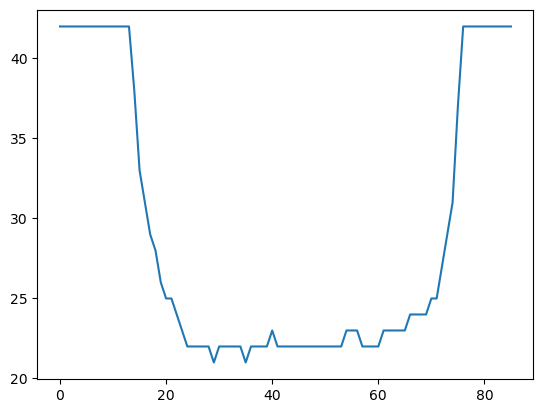

In [77]:
plt.plot(np.count_nonzero(thres, axis=1))

In [78]:
np.count_nonzero(thres, axis=1)

array([42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 38, 33, 31,
       29, 28, 26, 25, 25, 24, 23, 22, 22, 22, 22, 22, 21, 22, 22, 22, 22,
       22, 21, 22, 22, 22, 22, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 23, 23, 23, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24,
       24, 24, 25, 25, 27, 29, 31, 37, 42, 42, 42, 42, 42, 42, 42, 42, 42,
       42], dtype=int64)

(array([[ 0.,  0.,  0., ...,  0., 76., 21.],
        [ 0.,  0.,  0., ...,  0., 76., 21.],
        [ 0.,  0.,  0., ...,  0., 76., 21.],
        ...,
        [ 0.,  0.,  0., ..., 29., 68.,  0.],
        [ 0.,  0.,  0., ..., 29., 68.,  0.],
        [ 0.,  0.,  0., ..., 21., 76.,  0.]]),
 array([  0. ,  10.6,  21.2,  31.8,  42.4,  53. ,  63.6,  74.2,  84.8,
         95.4, 106. ]),
 <a list of 130 BarContainer objects>)

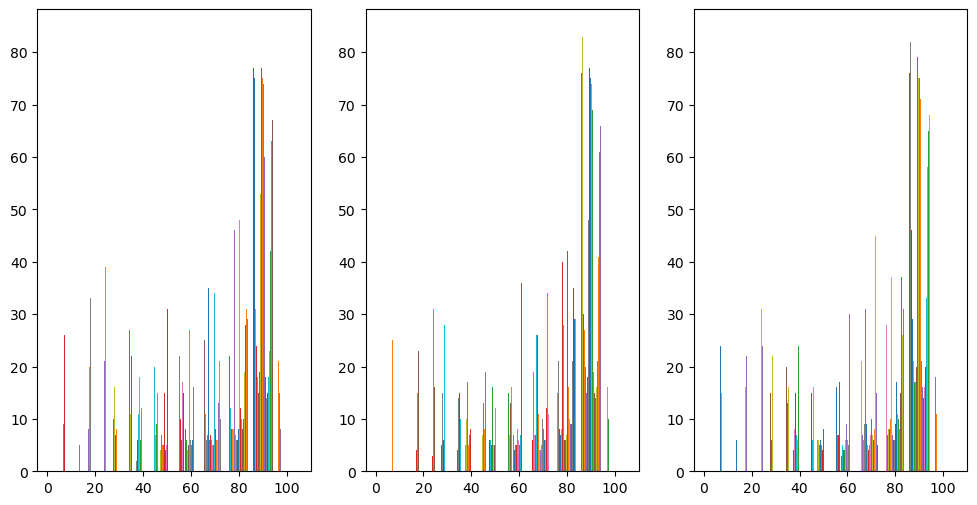

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.hist(img[:,:,0])
plt.subplot(1,3,2)
plt.hist(img[:,:,1])
plt.subplot(1,3,3)
plt.hist(img[:,:,2])


In [ ]:
cv.cvtColor()